<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Ciência de Dados
Prof. Caio Ponte

Universidade de Fortaleza

## Dataset: Olist

### Descrição
O **Brazilian E-Commerce Public Dataset by Olist** é um conjunto de dados transacionais de um marketplace brasileiro, contendo informações de aproximadamente 100 mil pedidos realizados entre 2016 e 2018. O Olist é uma startup que conecta pequenos lojistas a grandes marketplaces, facilitando a gestão e a venda de produtos online. O dataset inclui dados anonimizados sobre pedidos, clientes, produtos, pagamentos, frete e avaliações, permitindo visualizar cada compra desde o momento da transação até a entrega ao consumidor e a posterior avaliação do serviço. Além disso, há um conjunto de geolocalização que relaciona códigos postais brasileiros a coordenadas geográficas.

Esse conjunto de dados possibilita diversas análises em Ciência de Dados, como o estudo de tendências do e-commerce, o comportamento dos consumidores e a eficiência logística. Ele permite investigar padrões de compra, formas de pagamento, tempo de entrega e a relação entre avaliações e a experiência do cliente. Por ser um dataset real e abrangente, é ideal para exploração de dados, visualizações, análises estatísticas e construção de modelos preditivos.

Referência: [Link do Dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/)

### Tabelas

1. **`olist_orders_dataset`**: representa os pedidos realizados
  - `order_id`: id único do pedido;
  - `customer_id`: chave para o conjunto de dados do cliente;
  - `order_status`: referência de status do pedido;
  - `order_purchase_timestamp`: data/hora da compra;
  - `order_approved_at`: data/hora aprovação da compra;
  - `order_delivered_carrier_date`: data/hora da postagem do pedido, ou seja, quando ele foi entregue ao parceiro logístico/transportadora;
  - `order_delivered_customer_date`: data/hora em que o pedido foi entregue ao cliente;
  - `order_estimated_delivery_date`: data/hora estimada de entrega do pedido (informada ao cliente no momento da compra);

2. **`olist_order_items_dataset`**: incluem os dados sobre os itens comprados em cada pedido (*order*)
  - `order_id`: chave para o *dataset* de pedidos;
  - `order_item_id`: número sequencial que identifica a ordem do(s) item(ns) incluído(s) dentro da pedido;
  - `product_id`: id único do produto (chave para o *dataset* de produtos);
  - `seller_id`: id único do vendedor (chave para o *dataset* de vendedores/*sellers*);
  - `shipping_limit_date`: prazo máximo para o vendedor despachar o item (ou seja, processar o pedido para o parceiro logístico/transportadora);
  - `price`: preço unitário do item do pedido;
  - `freight_value`: custo únitário do frete para o item.

3. **`olist_customers_dataset`**: inclui dados sobre os clientes e suas localizações (usado para identificar clientes únicos e para encontrar o local de entrega dos pedidos)
  - `customer_id`: chave para o *dataset* orders;
  - `customer_unique_id`: id único do cliente;
  - `customer_zip_code_prefix`: primeiros cinco dígitos do código postal do cliente;
  - `customer_city`: cidade do cliente;
  - `customer_state`: estado do cliente;

### Schema

<img src="https://i.imgur.com/HRhd2Y0.png" height=400>


In [109]:
import kagglehub

path = kagglehub.dataset_download('olistbr/brazilian-ecommerce')

print('Caminho do arquivo:', path)

Caminho do arquivo: /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2


In [110]:
!ls {path}

olist_customers_dataset.csv	  olist_orders_dataset.csv
olist_geolocation_dataset.csv	  olist_products_dataset.csv
olist_order_items_dataset.csv	  olist_sellers_dataset.csv
olist_order_payments_dataset.csv  product_category_name_translation.csv
olist_order_reviews_dataset.csv


## Análise de Dados

In [111]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Perguntas

#### Quantas vendas foram realizadas durante todo o período do dataset? 🐣

In [112]:
path_orders = os.path.join(path, 'olist_orders_dataset.csv')

print(path)
print(path_orders)

/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2
/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_orders_dataset.csv


In [113]:
path_orders = os.path.join(path, 'olist_orders_dataset.csv')

df_orders = pd.read_csv(path_orders)

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [114]:
df_orders['order_id'].nunique()

99441

In [115]:
df_orders['customer_id'].nunique()

99441

In [116]:
order_na = df_orders.isna().sum()
order_na

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


#### Quantos pedidos existem para cada status? 🐣

In [117]:
status_percent = df_orders['order_status'].value_counts(normalize=True)

status_percent

,proportion
order_status,
delivered,0.970203
shipped,0.011132
canceled,0.006285
unavailable,0.006124
invoiced,0.003158
processing,0.003027
created,0.000050
approved,0.000020


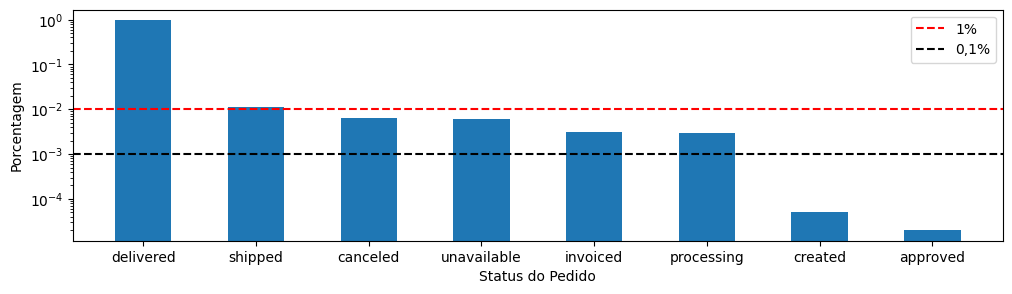

In [118]:
x = status_percent.index
y = status_percent.values

plt.figure(figsize=(12,3))
plt.bar(x, y, width=0.5)
plt.axhline(0.01, color='r', linestyle='--', label='1%')
plt.axhline(0.001, color='k', linestyle='--', label='0,1%')
plt.xlabel('Status do Pedido')
plt.ylabel('Porcentagem')
plt.yscale('log')
plt.legend()
plt.show()

In [119]:
# A maioria das datas de entrega nulas foram aquelas que não foram entregues
df_orders[df_orders['order_delivered_customer_date'].isna()]['order_status'].value_counts()

,count
order_status,
shipped,1107
canceled,619
unavailable,609
invoiced,314
processing,301
delivered,8
created,5
approved,2


In [120]:
df_orders.dropna(inplace=True)

print(len(df_orders))

df_orders.isna().sum()

96461


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


#### Qual a distribuição dos dados de tempo de entrega dos produtos na plataforma? ⭐

In [121]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


Códigos de Formatação de datas:

- `%d`: dia do mês - 1 a 31
- `%m`: mês - 1 a 12
- `%Y`: ano (yyyy)
- `%H`: hora (formato com 24h) - 0 a 23
- `%I`: hora (formato com 12h) - 0 a 12
- `%p`: AM/PM
- `%M`: minutos - 0 a 59
- `%S`: segundos - 0 a 59
- `%j`: dia do ano - 1 a 366
- `%j`: semana do ano - 0 a 53

[Referência](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)

2018-08-28 15:26:39	 $→$ `%Y-%m-%d %H:%M:%S`

In [122]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')

df_orders['purchase_date'] = df_orders['order_purchase_timestamp'].dt.date
df_orders['purchase_month'] = df_orders['order_purchase_timestamp'].dt.month # mês
df_orders['purchase_year'] = df_orders['order_purchase_timestamp'].dt.year # ano
df_orders['purchase_day'] = df_orders['order_purchase_timestamp'].dt.day # dia do mês
df_orders['purchase_hour'] = df_orders['order_purchase_timestamp'].dt.hour # hora do dia
df_orders['purchase_weekday'] = df_orders['order_purchase_timestamp'].dt.weekday # dia da semana: 0-Seg

df_orders['purchase_month_year'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y-%m')

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_month,purchase_year,purchase_day,purchase_hour,purchase_weekday,purchase_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,10,2017,2,10,0,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,7,2018,24,20,1,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08,8,2018,8,8,2,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18,11,2017,18,19,5,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13,2,2018,13,21,1,2018-02


In [123]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  object        
 5   order_delivered_carrier_date   96461 non-null  object        
 6   order_delivered_customer_date  96461 non-null  object        
 7   order_estimated_delivery_date  96461 non-null  object        
 8   purchase_date                  96461 non-null  object        
 9   purchase_month                 96461 non-null  int32         
 10  purchase_year                  96461 non-null  int32         
 11  purchase_day        

In [124]:
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_month,purchase_year,purchase_day,purchase_hour,purchase_weekday,purchase_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02,10,2017,2,10,0,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-24,7,2018,24,20,1,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08,8,2018,8,8,2,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-18,11,2017,18,19,5,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-13,2,2018,13,21,1,2018-02


In [125]:
df_orders['delta_compra_chegada'] = df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']
df_orders['delta_compra_chegada'] = df_orders['delta_compra_chegada'].dt.days

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_month,purchase_year,purchase_day,purchase_hour,purchase_weekday,purchase_month_year,delta_compra_chegada
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02,10,2017,2,10,0,2017-10,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-24,7,2018,24,20,1,2018-07,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08,8,2018,8,8,2,2018-08,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-18,11,2017,18,19,5,2017-11,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-13,2,2018,13,21,1,2018-02,2


In [126]:
media_tempo_entrega = df_orders['delta_compra_chegada'].mean()
mediana_tempo_entrega = df_orders['delta_compra_chegada'].median()

print('Media:', media_tempo_entrega)
print('Mediana:', mediana_tempo_entrega)

Media: 12.09358186209971
Mediana: 10.0


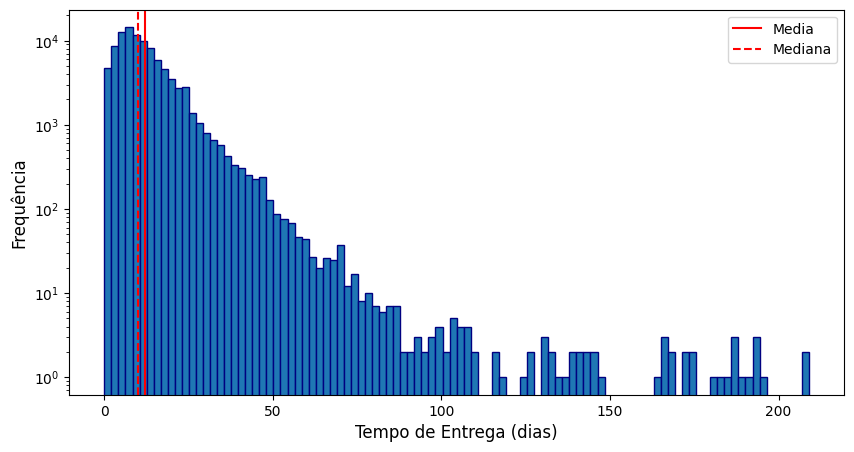

In [127]:
plt.figure(figsize=(10,5))
plt.hist(df_orders['delta_compra_chegada'], bins=100, edgecolor='navy')
plt.xlabel('Tempo de Entrega (dias)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.axvline(media_tempo_entrega, color='red', linestyle='-', label='Media')
plt.axvline(mediana_tempo_entrega, color='red', linestyle='--', label='Mediana')
plt.yscale('log')
plt.legend()
plt.show()

In [128]:
df_orders[df_orders['delta_compra_chegada'] > 100]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_month,purchase_year,purchase_day,purchase_hour,purchase_weekday,purchase_month_year,delta_compra_chegada
1621,a4efaffc506a395c9cea7402b078c1e5,2020559b0ae9910898ef57a8159533ab,delivered,2018-01-17 10:50:09,2018-01-17 10:58:33,2018-01-24 12:30:54,2018-05-07 19:25:33,2018-02-23,2018-01-17,1,2018,17,10,2,2018-01,110
3077,8b7fd198ad184563c231653673e75a7f,3eddc75fe2314996f68ddcd89ddb5caf,delivered,2017-11-14 10:04:27,2017-11-17 08:47:00,2018-02-26 17:27:15,2018-02-27 18:05:08,2017-11-28,2017-11-14,11,2017,14,10,1,2017-11,105
3202,4f39a94d6e474819d898d6df7d394996,27a410dccb395b6ce45963874d158352,delivered,2017-04-28 16:28:03,2017-04-29 02:42:51,2017-05-09 14:06:48,2017-09-19 13:54:18,2017-05-30,2017-04-28,4,2017,28,16,4,2017-04,143
4666,b31c7dea63bb08f8cdd1ec32514ccf0b,2a351c540a0cbdd0d9c266626f6d3acc,delivered,2017-09-26 18:35:35,2017-09-26 18:49:09,2017-09-29 16:23:06,2018-02-05 21:25:43,2017-10-19,2017-09-26,9,2017,26,18,1,2017-09,132
10383,3602a80b09d914236f74c733631f3b8b,367000b9bd508db790e048df2f6d6af9,delivered,2018-01-31 20:38:38,2018-02-02 08:55:51,2018-02-02 18:48:35,2018-05-18 11:06:52,2018-03-19,2018-01-31,1,2018,31,20,2,2018-01,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86520,ed8e9faf1b75f43ee027103957135663,14fcb7be0e0a5868f190e1cda895d6fa,delivered,2017-11-29 15:10:14,2017-12-01 11:31:53,2017-12-04 19:48:46,2018-05-21 18:22:18,2017-12-19,2017-11-29,11,2017,29,15,2,2017-11,173
89130,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,2017-03-08,3,2017,8,22,2,2017-03,194
92212,29c3b79aace1b72a82b1232bf494e16f,9225e82d7b09bfc606f1849de9300050,delivered,2017-12-16 10:04:35,2017-12-16 10:15:25,2018-01-15 17:51:55,2018-04-28 15:51:50,2018-01-24,2017-12-16,12,2017,16,10,5,2017-12,133
95136,17cc6728043d53cc948551dfbf0a338b,dcfb92c7e6d519560090aeb5bfa03f0c,delivered,2017-11-25 12:14:38,2017-11-25 12:33:04,2017-11-28 18:19:49,2018-04-16 23:26:51,2017-12-27,2017-11-25,11,2017,25,12,5,2017-11,142


#### Os clientes compram mais no final de semana? 🐣

In [129]:
vendas_semanas = df_orders['purchase_weekday'].value_counts()
vendas_semanas.sort_index(inplace=True)
vendas_semanas

,count
purchase_weekday,
0,15703
1,15502
2,15074
3,14320
4,13681
5,10548
6,11633


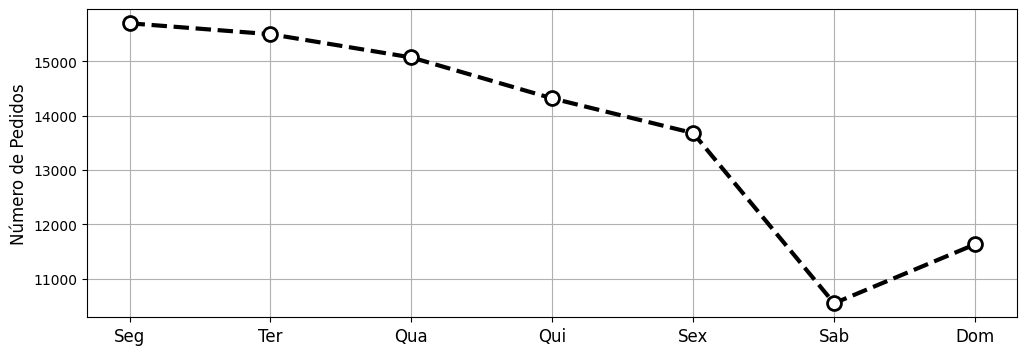

In [130]:
xlabels = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']

x = vendas_semanas.index
y = vendas_semanas.values

plt.figure(figsize=(12,4))
plt.plot(x, y, 'ko--', linewidth=3, markersize=10, markeredgecolor='black', markerfacecolor='white', markeredgewidth=2)
plt.xticks(x, xlabels, fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.grid()
plt.show()

#### Os clientes compram mais em qual período do dia? ⭐

In [131]:
intervalos = [0, 6, 12, 18, 24]
rotulos = ['Madrugada', 'Manhã', 'Tarde', 'Noite']

df_orders['periodo_compra'] = pd.cut(df_orders['purchase_hour'], bins=intervalos, labels=rotulos)

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_month,purchase_year,purchase_day,purchase_hour,purchase_weekday,purchase_month_year,delta_compra_chegada,periodo_compra
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02,10,2017,2,10,0,2017-10,8,Manhã
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-24,7,2018,24,20,1,2018-07,13,Noite
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08,8,2018,8,8,2,2018-08,9,Manhã
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-18,11,2017,18,19,5,2017-11,13,Noite
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-13,2,2018,13,21,1,2018-02,2,Noite


In [132]:
vendas_periodo = df_orders['periodo_compra'].value_counts()
vendas_periodo.sort_index(inplace=True)

vendas_periodo

,count
periodo_compra,
Madrugada,2749
Manhã,26914
Tarde,36956
Noite,27520


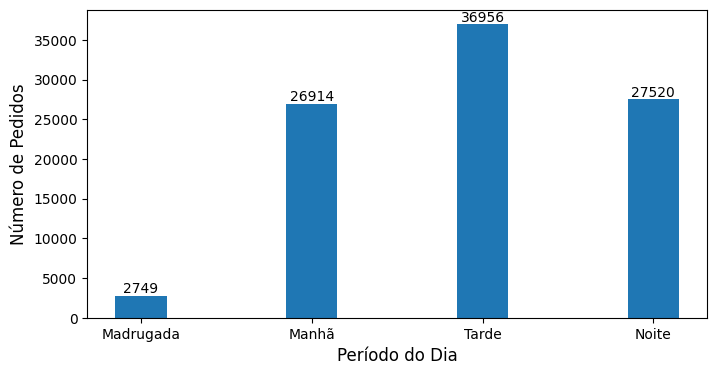

In [133]:
x = vendas_periodo.index
y = vendas_periodo.values

plt.figure(figsize=(8,4))
barras = plt.bar(x, y, width=0.3)

for b in barras:
    altura = b.get_height()
    meio_barra = b.get_x() + b.get_width() / 2
    plt.text(meio_barra, altura, altura, ha='center', va='bottom', fontsize=10)

plt.xlabel('Período do Dia', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)

plt.show()

#### Existe relação do número de compras com os dias normais de pagamento de salário? ⭐

In [134]:
vendas_dia = df_orders['purchase_day'].value_counts()
vendas_dia.sort_index(inplace=True)

vendas_dia.head()

,count
purchase_day,
1,3010
2,3120
3,3194
4,3375
5,3318


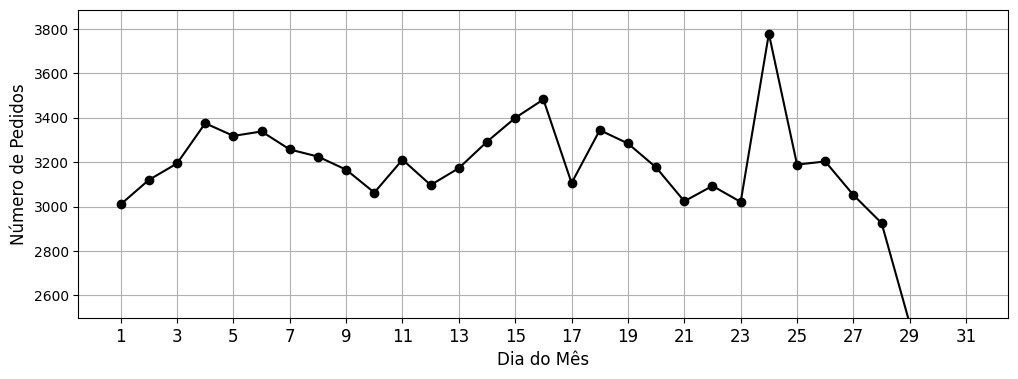

In [135]:
plt.figure(figsize=(12,4))
plt.plot(vendas_dia.index, vendas_dia.values, 'ok-')

xticks = np.arange(1, 32, 2)

plt.xlabel('Dia do Mês', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.xticks(xticks, fontsize=12)
plt.grid()
plt.ylim(2500)
plt.show()

#### Como se comporta a série temporal de venda diárias? Existe uma tendência de crescimento nas vendas no e-Commerce brasileiro? ⭐

In [136]:
serie_temporal = df_orders.groupby(by='purchase_date')['order_id'].nunique()
serie_temporal.sort_index(inplace=True)

serie_temporal

,order_id
purchase_date,
2016-09-15,1
2016-10-03,8
2016-10-04,54
2016-10-05,35
2016-10-06,41
...,...
2018-08-25,69
2018-08-26,73
2018-08-27,66


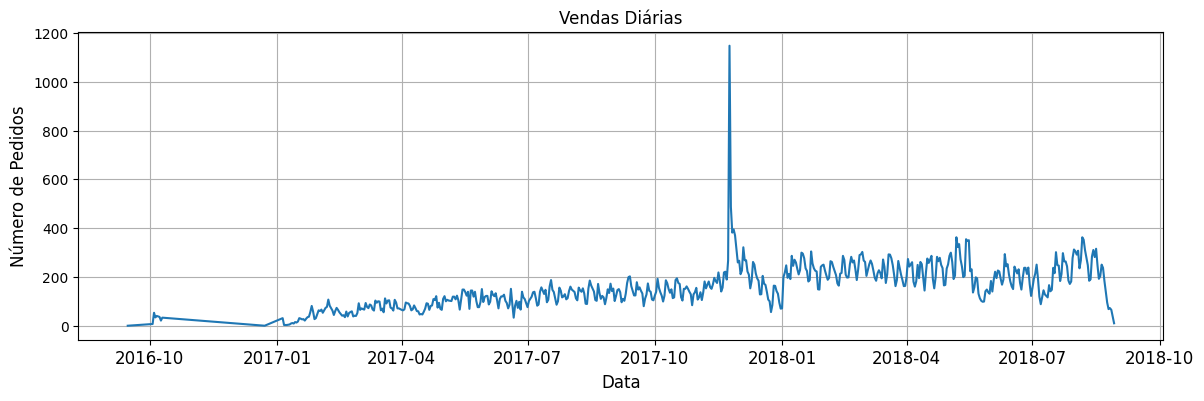

In [137]:
x = serie_temporal.index
y = serie_temporal.values

plt.figure(figsize=(14,4))
plt.plot(x, y)

plt.xticks(fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.title('Vendas Diárias')
# plt.ylim(0,400)
plt.grid()

plt.show()

In [138]:
serie_temporal.sort_values()

,order_id
purchase_date,
2016-09-15,1
2016-12-23,1
2017-01-08,4
2017-01-07,4
2017-01-06,4
...,...
2017-11-28,371
2017-11-26,382
2017-11-27,395


#### Qual o valor do faturamento na plataforma durante todo o período? 🐣

In [139]:
df_order_items = pd.read_csv(os.path.join(path, 'olist_order_items_dataset.csv'))

df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [140]:
df_order_items.shape

(112650, 7)

In [141]:
df_order_items.groupby(by='order_id')['product_id'].nunique().sort_values()

,product_id
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
a9da66f1dfe4cca8956f5e74619c2cb9,1
a9da0d64f6c4dff3f3f383f6b076b24a,1
a9d9e48bc0905664f33c53779b5edfb6,1
a9d9773efe0a981195d2861250cff4d9,1
...,...
3990f96693d321ac142fff312bf3706a,6
ad850e69fce9a512ada84086651a2e7d,7
77df84f9195be22a4e9cb72ca9e8b4c2,7


In [142]:
df_order_items[df_order_items['order_id'] == 'ca3625898fbd48669d50701aba51cd5f']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
89007,ca3625898fbd48669d50701aba51cd5f,1,1065e0ebef073787a7bf691924c60eeb,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,309.0,1.84
89008,ca3625898fbd48669d50701aba51cd5f,2,0cf2faf9749f53924cea652a09d8e327,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,33.9,1.84
89009,ca3625898fbd48669d50701aba51cd5f,3,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,159.0,3.67
89010,ca3625898fbd48669d50701aba51cd5f,4,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,159.0,3.67
89011,ca3625898fbd48669d50701aba51cd5f,5,5dae498eff2d80057f56122235a36aff,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15
89012,ca3625898fbd48669d50701aba51cd5f,6,4a5c3967bfd3629fe07ef4d0cc8c3818,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,109.9,0.15
89013,ca3625898fbd48669d50701aba51cd5f,7,678c229b41c0e497d35a25a8be1cc631,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15
89014,ca3625898fbd48669d50701aba51cd5f,8,21b524c4c060169fa75ccf08c7da4627,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,63.7,0.15
89015,ca3625898fbd48669d50701aba51cd5f,9,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,56.0,3.68
89016,ca3625898fbd48669d50701aba51cd5f,10,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,56.0,3.68


In [180]:
df_order_items.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
total,0


In [144]:
df_order_items['total'] = df_order_items['price'] + df_order_items['freight_value']

df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


In [145]:
faturamento_total_milhoes = df_order_items['total'].sum() / 10**6

faturamento_total_milhoes

15.84355324

#### Qual a distribuição do valor de venda por pedido? O valor médio representa bem essa distribuição? ⭐

In [146]:
valor_por_pedido = df_order_items.groupby(by='order_id')['total'].sum()

valor_por_pedido

,total
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...
fffc94f6ce00a00581880bf54a75a037,343.40
fffcd46ef2263f404302a634eb57f7eb,386.53
fffce4705a9662cd70adb13d4a31832d,116.85


In [181]:
media = valor_por_pedido.mean()
mediana = valor_por_pedido.median()
minimo = valor_por_pedido.min()
maximo = valor_por_pedido.max()

print('Média:', media)
print('Mediana:', mediana)
print('Mínimo:', minimo)
print('Máximo:', maximo)

Média: 160.57763809214927
Mediana: 105.29
Mínimo: 9.59
Máximo: 13664.08


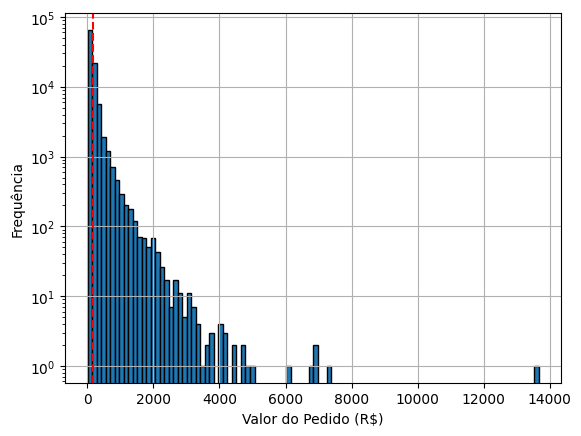

In [186]:
plt.hist(valor_por_pedido, bins=100, edgecolor='black')
plt.axvline(x=media, color='r', linestyle='--')

plt.xlabel('Valor do Pedido (R$)')
plt.ylabel('Frequência')
plt.yscale('log')
plt.grid()
# plt.xlim(0, 4000)

plt.show()

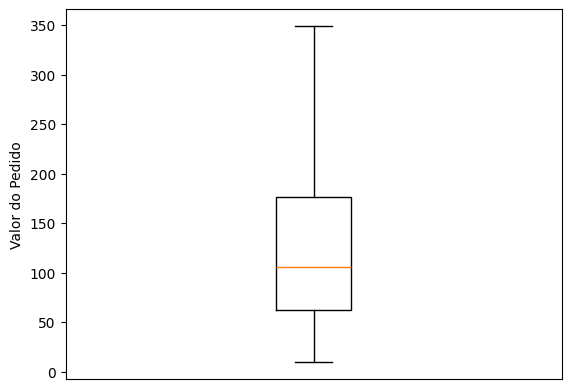

In [190]:
plt.boxplot(valor_por_pedido, showfliers=False) # sem mostrar outliers

plt.ylabel('Valor do Pedido')
plt.xticks([])
# plt.yscale('log')

plt.show()

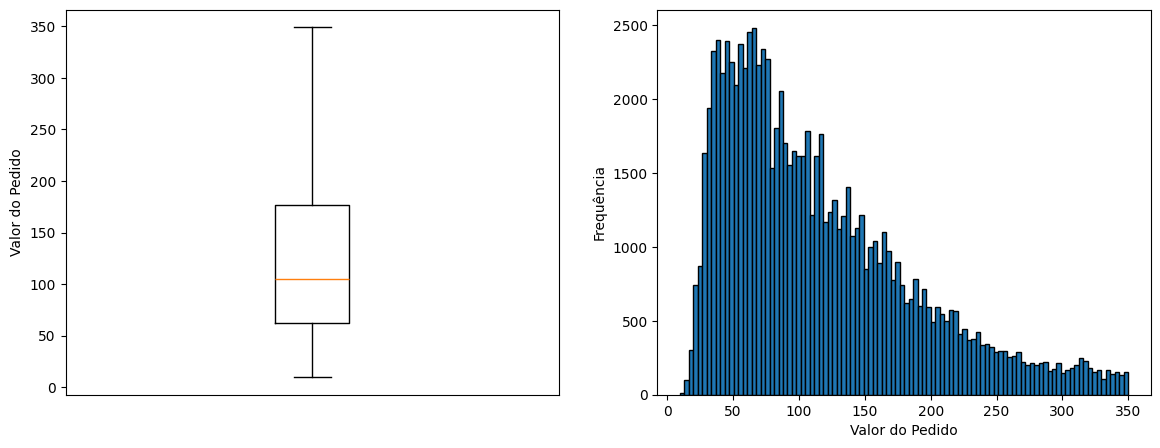

In [191]:
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)

plt.boxplot(valor_por_pedido, showfliers=False)

plt.ylabel('Valor do Pedido')
plt.xticks([])

#

plt.subplot(1, 2, 2)

plt.hist(valor_por_pedido[valor_por_pedido < 350], bins=100, edgecolor='black')

plt.xlabel('Valor do Pedido')
plt.ylabel('Frequência')

plt.show()

In [151]:
a = len(valor_por_pedido[valor_por_pedido < 350])
b = len(valor_por_pedido)

p = np.round(100*a/b, 2)

print(f'Pedidos de até R$ 350 representa cerca de {p}% das vendas')

Pedidos de até R$ 350 representa cerca de 92.16% das vendas


#### Qual o número médio de itens diferentes por pedido? ⭐

In [193]:
itens_por_pedido = df_order_items.groupby(by='order_id')['product_id'].nunique()
itens_por_pedido = itens_por_pedido.value_counts()
itens_por_pedido.sort_index(inplace=True)

itens_por_pedido

,count
product_id,
1,95430
2,2846
3,298
4,70
5,8
6,10
7,3
8,1


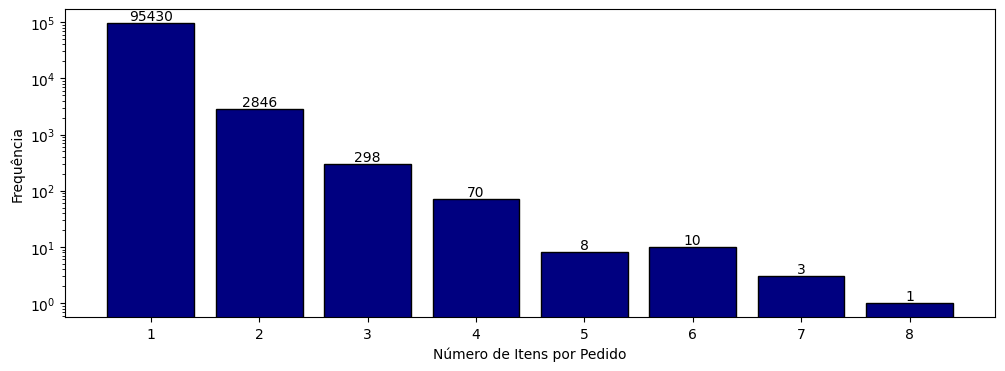

In [196]:
x = itens_por_pedido.index
y = itens_por_pedido.values

plt.figure(figsize=(12,4))

barras = plt.bar(x, y, edgecolor='black', color='navy')

for b in barras:
    altura = b.get_height()
    meio_barra = b.get_x() + b.get_width() / 2
    plt.text(meio_barra, altura, altura, ha='center', va='bottom', fontsize=10)

plt.xlabel('Número de Itens por Pedido')
plt.ylabel('Frequência')
plt.yscale('log')

plt.show()

#### Existe diferença do faturamento entre os anos de 2017 e 2018? Faça a comparação mês a mês. ⭐⭐

In [200]:
df_orders2 = df_orders[['order_id', 'purchase_month', 'purchase_year']]
df_order_items2 = df_order_items[['order_id', 'total']]

df_order_items2 = pd.merge(df_order_items2, df_orders2, on='order_id', how='left')

df_order_items2

,order_id,total,purchase_month,purchase_year
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,9.0,2017.0
1,00018f77f2f0320c557190d7a144bdd3,259.83,4.0,2017.0
2,000229ec398224ef6ca0657da4fc703e,216.87,1.0,2018.0
3,00024acbcdf0a6daa1e931b038114c75,25.78,8.0,2018.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,2.0,2017.0
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,343.40,4.0,2018.0
112646,fffcd46ef2263f404302a634eb57f7eb,386.53,7.0,2018.0
112647,fffce4705a9662cd70adb13d4a31832d,116.85,10.0,2017.0
112648,fffe18544ffabc95dfada21779c9644f,64.71,8.0,2017.0


In [202]:
faturamento_2017 = df_order_items2[df_order_items2['purchase_year'] == 2017]
faturamento_2017 = faturamento_2017.groupby(by='purchase_month')['total'].sum()
faturamento_2017.sort_index(inplace=True)

faturamento_2018 = df_order_items2[df_order_items2['purchase_year'] == 2018]
faturamento_2018 = faturamento_2018.groupby(by='purchase_month')['total'].sum()
faturamento_2018.sort_index(inplace=True)

In [203]:
faturamento_2017

,total
purchase_month,
1.0,127367.44
2.0,269399.65
3.0,414330.95
4.0,390812.40
5.0,566657.40
6.0,490050.37
7.0,566299.08
8.0,645832.36
9.0,700883.51


In [204]:
faturamento_2018

,total
purchase_month,
1.0,1077887.46
2.0,966212.50
3.0,1120598.24
4.0,1132878.93
5.0,1128774.52
6.0,1011448.96
7.0,1027286.52
8.0,985491.64


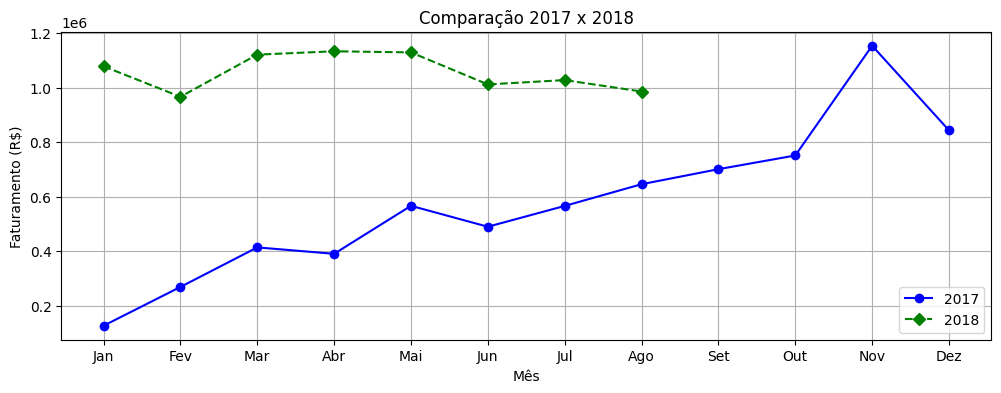

In [207]:
x1 = faturamento_2017.index
y1 = faturamento_2017.values

x2 = faturamento_2018.index
y2 = faturamento_2018.values

labels_x = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(12,4))

plt.plot(x1, y1, 'bo-', label='2017')
plt.plot(x2, y2, 'gD--', label='2018')

plt.xticks(x1, labels_x)
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
plt.title('Comparação 2017 x 2018')
plt.legend()
plt.grid()

plt.show()

#### Qual a evolução do número de usuários compradores com o tempo? ⭐⭐⭐

In [208]:
df_customers = pd.read_csv(os.path.join(path, 'olist_customers_dataset.csv'))

print(df_customers.shape)

df_customers.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [209]:
clientes_distintos = df_customers['customer_unique_id'].nunique()

clientes_distintos

96096

In [210]:
df_orders2 = df_orders[['order_id', 'customer_id', 'purchase_month_year', 'delta_compra_chegada']]

df_orders2.head()

,order_id,customer_id,purchase_month_year,delta_compra_chegada
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02,2


In [211]:
df_customer_orders = pd.merge(df_customers, df_orders2, on='customer_id', how='right')

df_customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,purchase_month_year,delta_compra_chegada
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,2017-10,8
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,2018-07,13
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,2018-08,9
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,2017-11,13
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,2018-02,2


In [212]:
df_customer_orders_items = pd.merge(df_customer_orders, df_order_items, on='order_id', how='right')
# df_customer_orders_items.sort_values(by='purchase_month_year', inplace=True)

df_customer_orders_items

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,purchase_month_year,delta_compra_chegada,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total
0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,2017-09,7.0,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,2017-04,16.0,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,000229ec398224ef6ca0657da4fc703e,2018-01,7.0,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,2018-08,6.0,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02,25.0,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077.0,sao luis,MA,fffc94f6ce00a00581880bf54a75a037,2018-04,17.0,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,343.40
112646,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690.0,curitiba,PR,fffcd46ef2263f404302a634eb57f7eb,2018-07,9.0,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,386.53
112647,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039.0,sao paulo,SP,fffce4705a9662cd70adb13d4a31832d,2017-10,4.0,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,116.85
112648,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289.0,vinhedo,SP,fffe18544ffabc95dfada21779c9644f,2017-08,1.0,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,64.71


In [213]:
usuarios_por_tempo = df_customer_orders_items.groupby(by='purchase_month_year')['customer_unique_id'].nunique()
usuarios_por_tempo.sort_index(inplace=True)

usuarios_por_tempo

,customer_unique_id
purchase_month_year,
2016-09,1
2016-10,267
2016-12,1
2017-01,716
2017-02,1618
2017-03,2508
2017-04,2274
2017-05,3478
2017-06,3076


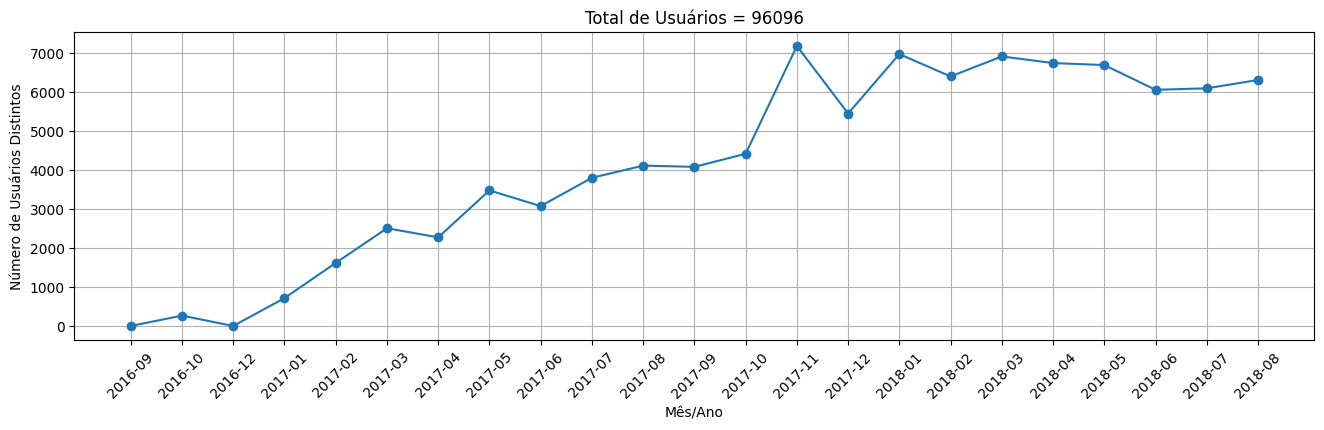

In [216]:
x = usuarios_por_tempo.index
y = usuarios_por_tempo.values

plt.figure(figsize=(16,4))

plt.plot(x, y, 'o-')
plt.xlabel('Mês/Ano')
plt.ylabel('Número de Usuários Distintos')
plt.title(f'Total de Usuários = {clientes_distintos}')
plt.grid()
plt.xticks(rotation=45)
plt.show()

#### Como se comporta a recorrência de compra dos clientes? Ou seja, existem clientes mais assíduos do que outros? ⭐⭐

In [219]:
pedidos_por_usuario = df_customer_orders_items.groupby(by='customer_unique_id')['order_id'].nunique()
pedidos_por_usuario = pedidos_por_usuario.value_counts()
pedidos_por_usuario.sort_index(inplace=True)

pedidos_por_usuario

,count
order_id,
1,90542
2,2572
3,181
4,28
5,9
6,5
7,3
9,1
15,1


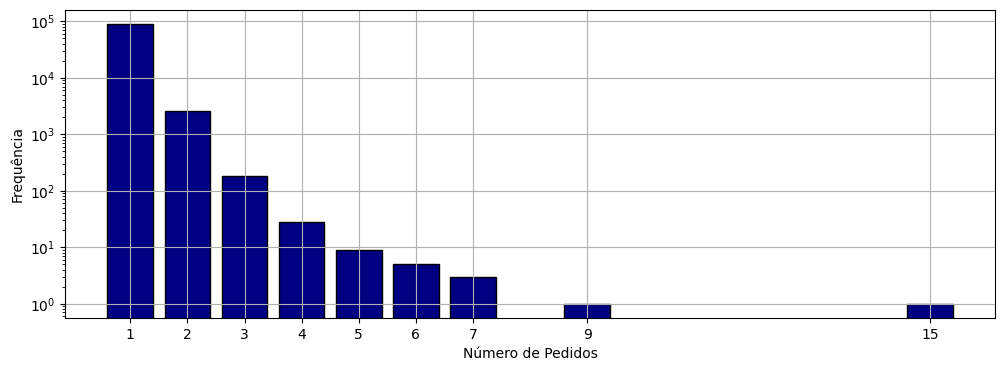

In [222]:
plt.figure(figsize=(12,4))

plt.bar(pedidos_por_usuario.index, pedidos_por_usuario.values, edgecolor='black', color='navy')

plt.xlabel('Número de Pedidos')
plt.ylabel('Frequência')
plt.xticks(pedidos_por_usuario.index)
plt.yscale('log')
plt.grid()
plt.show()

#### Quais estados que pagam mais frete? ⭐⭐⭐

In [224]:
pedido_frete = df_customer_orders_items.groupby(by='order_id')['freight_value'].sum()
pedido_frete = pedido_frete.reset_index()

pedido_frete

,order_id,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,13.29
1,00018f77f2f0320c557190d7a144bdd3,19.93
2,000229ec398224ef6ca0657da4fc703e,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,36.53
98663,fffce4705a9662cd70adb13d4a31832d,16.95
98664,fffe18544ffabc95dfada21779c9644f,8.72


In [225]:
df_customer_orders_items2 = df_customer_orders_items[['customer_state', 'order_id']]
df_customer_orders_items2 = pd.merge(df_customer_orders_items2, pedido_frete, on='order_id', how='left')

df_customer_orders_items2

,customer_state,order_id,freight_value
0,RJ,00010242fe8c5a6d1ba2dd792cb16214,13.29
1,SP,00018f77f2f0320c557190d7a144bdd3,19.93
2,MG,000229ec398224ef6ca0657da4fc703e,17.87
3,SP,00024acbcdf0a6daa1e931b038114c75,12.79
4,SP,00042b26cf59d7ce69dfabb4e55b4fd9,18.14
...,...,...,...
112645,MA,fffc94f6ce00a00581880bf54a75a037,43.41
112646,PR,fffcd46ef2263f404302a634eb57f7eb,36.53
112647,SP,fffce4705a9662cd70adb13d4a31832d,16.95
112648,SP,fffe18544ffabc95dfada21779c9644f,8.72


In [226]:
estado_frete_medio = df_customer_orders_items2.groupby(by='customer_state')['freight_value'].mean()
estado_frete_medio.sort_values(ascending=False, inplace=True)

estado_frete_medio

,freight_value
customer_state,
PB,68.974403
AC,54.582418
RR,54.382391
MA,51.297184
RO,51.229707
PI,50.189293
AP,48.871111
TO,47.761806
SE,46.885547


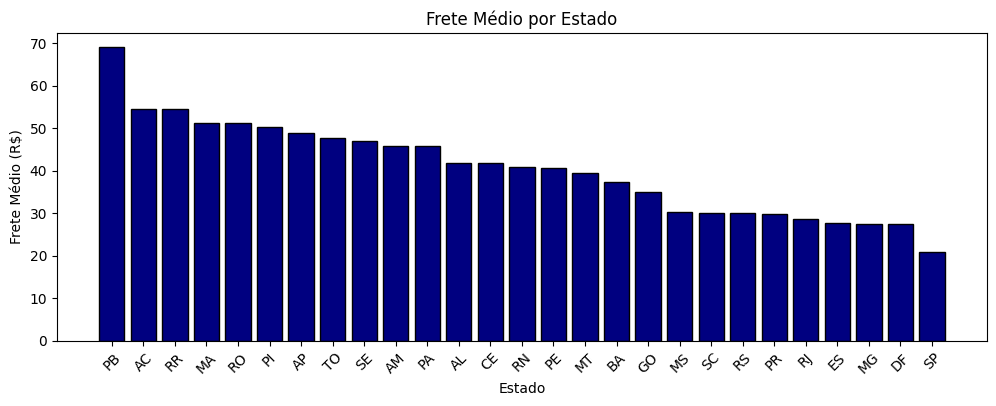

In [227]:
x = estado_frete_medio.index
y = estado_frete_medio.values

plt.figure(figsize=(12,4))

plt.bar(x, y, edgecolor='black', color='navy')

plt.xlabel('Estado')
plt.ylabel('Frete Médio (R$)')
plt.title('Frete Médio por Estado')
plt.xticks(rotation=45)
plt.show()

#### Existem alguma concentração na venda de produtos por vendendor? Ou seja, a maior parte do faturamento de um vendendor é relativa a poucos produtos da sua loja? ⭐⭐⭐

- Considere o vendedor com mais pedidos
- Dica: Princípio de Pareto
- Dica: Curva ABC

In [228]:
df_order_items['seller_id'].value_counts().head()

,count
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551


In [238]:
id_vendedor = '6560211a19b47992c3666cc44a7e94c0'

In [239]:
df_order_items2 = df_order_items[df_order_items['seller_id'] == id_vendedor]

produto_faturamento = df_order_items2.groupby('product_id')[['price']].sum()
produto_faturamento.sort_values(by='price', ascending=False, inplace=True)

produto_faturamento

,price
product_id,
a92930c327948861c015c919a0bcb4a8,12475.0
d017a2151d543a9885604dc62a3d9dcc,6860.0
c3ba4e8d3cb30049213b682e751e9d00,5506.0
2136c70bbe723d338fab53da3c03e6dc,2581.0
dca8cbb1c9d8a2db0fbc0c36b8d1a7bc,2501.0
...,...
924b2122bcd5d6eb53d37a167d3b1d47,38.0
acd427ee119d5c71c7a85ae488cb0a6a,38.0
49a968658d070a34b8ace5e4441d1030,35.0


In [241]:
produto_faturamento['price_percent'] = produto_faturamento / produto_faturamento.sum()
produto_faturamento['price_percent_cumsum'] = produto_faturamento['price_percent'].cumsum()
produto_faturamento['rank'] = np.arange(1, len(produto_faturamento)+1)
produto_faturamento['rank_percent'] = produto_faturamento['rank'] / produto_faturamento['rank'].max()

produto_faturamento

,price,price_percent,price_percent_cumsum,rank,rank_percent
product_id,,,,,
a92930c327948861c015c919a0bcb4a8,12475.0,0.101172,0.101172,1,0.003906
d017a2151d543a9885604dc62a3d9dcc,6860.0,0.055634,0.156807,2,0.007812
c3ba4e8d3cb30049213b682e751e9d00,5506.0,0.044654,0.201460,3,0.011719
2136c70bbe723d338fab53da3c03e6dc,2581.0,0.020932,0.222392,4,0.015625
dca8cbb1c9d8a2db0fbc0c36b8d1a7bc,2501.0,0.020283,0.242675,5,0.019531
...,...,...,...,...,...
924b2122bcd5d6eb53d37a167d3b1d47,38.0,0.000308,0.999019,252,0.984375
acd427ee119d5c71c7a85ae488cb0a6a,38.0,0.000308,0.999327,253,0.988281
49a968658d070a34b8ace5e4441d1030,35.0,0.000284,0.999611,254,0.992188


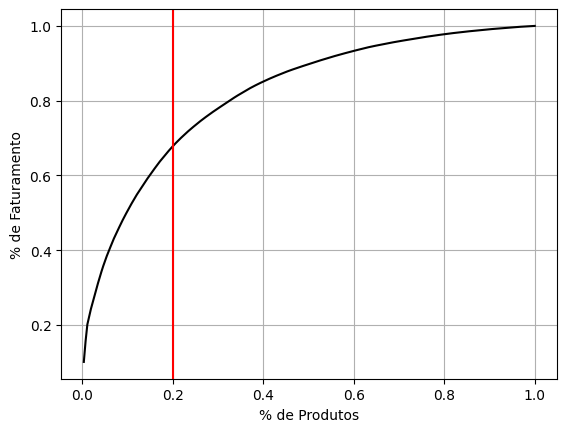

In [242]:
x = produto_faturamento['rank_percent']
y = produto_faturamento['price_percent_cumsum']

plt.plot(x, y, color='black')
plt.xlabel('% de Produtos')
plt.ylabel('% de Faturamento')
plt.axvline(0.2, color='red')
plt.grid()
plt.show()

In [243]:
i = (produto_faturamento['rank_percent'] - 0.20).abs().argmin()
p = produto_faturamento.iloc[i]['price_percent_cumsum']

print(f'Aproximadamente {np.round(100*p, 2)}% do faturamento advém dos 20% dos produtos mais vendidos')

Aproximadamente 67.65% do faturamento advém dos 20% dos produtos mais vendidos
